In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from Neural_Network import NeuralNetwork

In [74]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
        self.layers = layers
        self.alpha = alpha
        self.weights = []
        self.biases = []
        
        for i in range(len(layers) - 1):
            w = np.random.randn(layers[i], layers[i + 1]) * np.sqrt(2.0 / layers[i])
            b = np.zeros((1, layers[i + 1]))
            self.weights.append(w)
            self.biases.append(b)
    
    def sigmoid(self, X):
        return 1.0 / (1 + np.exp(-np.clip(X, -500, 500)))
    
    def sigmoid_derivative(self, X):
        return X * (1 - X)
    
    def forward(self, X):
        self.activations = [X]
        self.zs = []
        
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.zs.append(z)
            activation = self.sigmoid(z)
            self.activations.append(activation)
        
        return self.activations[-1]
    
    def backward(self, X, y):
        m = X.shape[0]
        delta = self.activations[-1] - y
        
        dW = []
        db = []
        
        for i in range(len(self.weights) - 1, -1, -1):
            dw = np.dot(self.activations[i].T, delta) / m
            db_ = np.sum(delta, axis=0, keepdims=True) / m
            
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.sigmoid_derivative(self.activations[i])
            
            dW.insert(0, dw)
            db.insert(0, db_)
        
        for i in range(len(self.weights)):
            self.weights[i] -= self.alpha * dW[i]
            self.biases[i] -= self.alpha * db[i]
    
    def train(self, X, y, epochs=1000, batch_size=32, verbose=True):
        history = []
        m = X.shape[0]
        
        for epoch in range(epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, batch_size):
                batch_indices = indices[i:min(i + batch_size, m)]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                
                self.forward(X_batch)
                self.backward(X_batch, y_batch)
            
            if verbose and (epoch + 1) % 100 == 0:
                predictions = self.predict(X)
                loss = self.calculate_loss(X, y)
                accuracy = accuracy_score(y.argmax(axis=1), predictions.argmax(axis=1))
                history.append(loss)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        
        return history
    
    def predict(self, X):
        return self.forward(X)
    
    def calculate_loss(self, X, y):
        y_pred = self.predict(X)
        return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

In [75]:
df = pd.read_csv('data/Iris.csv')
X = df.drop(['Species'], axis=1).values
y = df['Species'].values
scaler = StandardScaler()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = scaler.fit_transform(X)
y = np.eye(3)[y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [76]:
model = NeuralNetwork([4, 8, 3], alpha = 0.1)
history = model.train(X_train, y_train, epochs=1000, verbose=True)

ValueError: shapes (32,5) and (4,8) not aligned: 5 (dim 1) != 4 (dim 0)

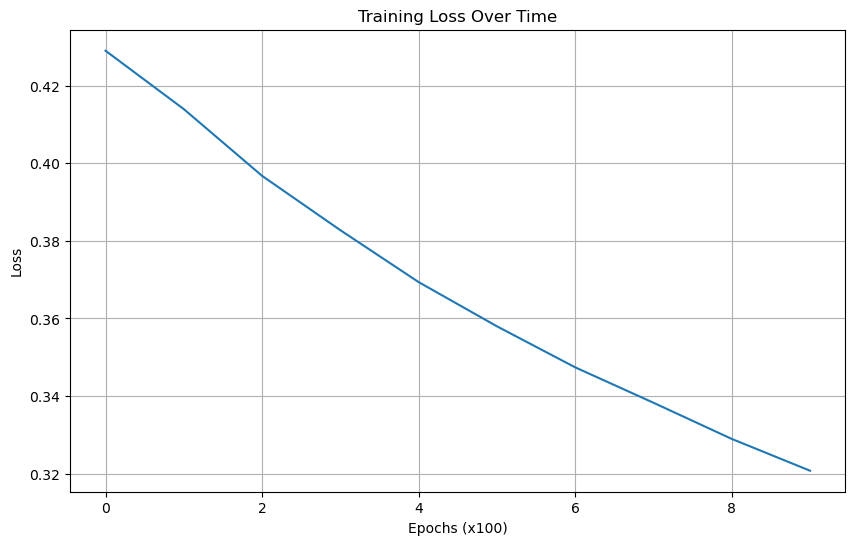

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history)
plt.title('Training Loss Over Time')
plt.xlabel('Epochs (x100)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
y_pred = model.predict(X_test)
accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
print(f"Test Accuracy: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print("Classes:", label_encoder.classes_)
print(cm)


Test Accuracy: 0.7272727272727273

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

